In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def LinUCB(alpha, K, d, t):
    
    # initial
    A = np.identity(d)
    b = np.zeros((d,1))
    #X = np.array([[0.1,0.2,0.8,0.3,0.7],[0.2,0.5,0.4,0.2,0.5],[0.3,0.4,0.2,0.5,0.1]])
    #X = np.random.rand(d,K)
    #theta_true = np.array([[0.2],[0.2],[0.2]])
    theta_true = np.random.rand(d,1)
    graph = pd.DataFrame(None, columns=['time','regret'])
    
    # Repeat K
    for i in range(t):
        theta = np.dot(np.linalg.inv(A),b)
        p = []
        X = np.random.rand(d,K)
        
        # calculate UCB
        for j in range(K):
            X_ = X[:,j].reshape((-1,1))
            p_ = np.dot(np.transpose(theta),X_)+alpha*np.sqrt(np.dot(np.dot(np.transpose(X_),np.linalg.inv(A)),X_))
            p.append(p_[0])
            
        # choose Max
        a = p.index(max(p))
        X_a = X[:,a].reshape((-1,1))
        
        
        # calculate payoff
        r = np.dot(np.transpose(X_a),theta_true)
        
        # update A and b
        A = A+np.dot(X_a,np.transpose(X_a))
        b = b+np.dot(X_a,r)
        
        # regret
        ## 누적합으로 바꾸기
        
        regret = np.dot(np.transpose(X_a),theta_true)-np.dot(np.transpose(X_a),theta)
        graph = graph.append({'time':i,'regret':regret},ignore_index=True)
    
    # 그래프그리기
    graph['accumulated_regret']=graph['regret'].cumsum()
        
    x=graph['time']
    y=graph['accumulated_regret']
        
    plt.plot(x,y)
    plt.xlabel('time')
    plt.ylabel('accumulated regret')
    plt.title('LinUCB')
    plt.show()

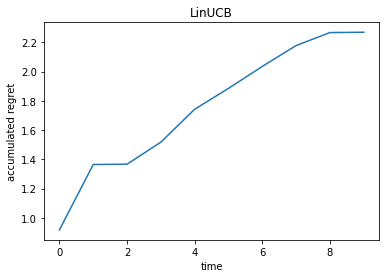

In [7]:
LinUCB(0.5,5,3,10)

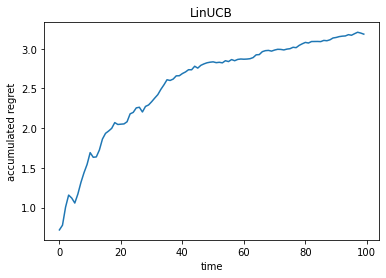

In [8]:
LinUCB(0.5,5,3,100)

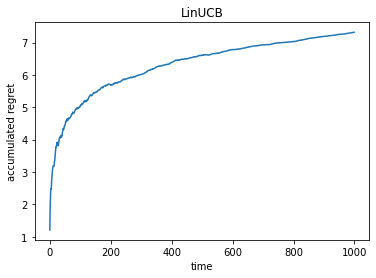

In [9]:
LinUCB(0.5,5,3,1000)